In [63]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import scipy.integrate as integrate
import matplotlib.pyplot as plt

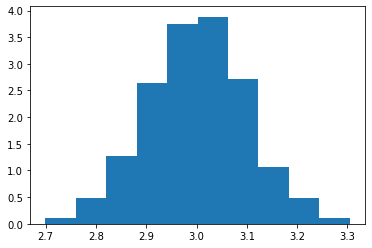

In [67]:
mu = 3
sigma = 0.1
sample_size = 1000
sample = np.random.normal(mu, sigma, sample_size)
actual_pdf = lambda x: norm.pdf(x, mu, sigma)
plt.hist(sample, bins=10, density=True)
plt.show()

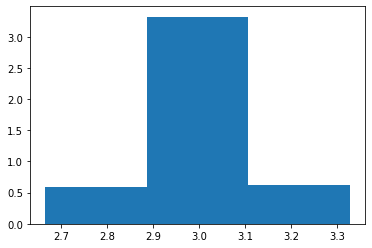

Areas: [0.58890119 3.32049669 0.62061125]
Bin boundaries: [2.66532954 2.88607965 3.10682976 3.32757986]
Bin widths: [0.22075011 0.22075011 0.22075011]
Sum of areas x length of bins: 1.0


In [55]:
underestimate_heights, underestimate_bins, _ = plt.hist(sample, bins=3, density=True)
plt.show()
print("Areas: {}".format(underestimate_heights))
print("Bin boundaries: {}".format(underestimate_bins))
print("Bin widths: {}".format(np.diff(underestimate_bins)))
print("Sum of areas x length of bins: {}".format(sum(np.diff(underestimate_bins)*underestimate_heights)))

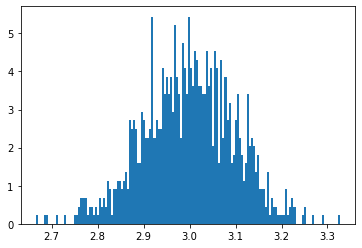

In [60]:
overestimate_heights, overestimate_bins, _ = plt.hist(sample, bins=150, density=True)
plt.show()

In [62]:
def histogram_pdf_estimate(heights, bin_boundaries):
    def histogram_function(x):
        for i in range(len(bin_boundaries)-1):
            if x >= bin_boundaries[i] and x < bin_boundaries[i+1]:
               # print("Checking: x between {} and {}".format())
                return heights[i]
        return 0
    return histogram_function

underestimated_pdf = histogram_pdf_estimate(underestimate_heights, underestimate_bins)
overestimated_pdf = histogram_pdf_estimate(overestimate_heights, overestimate_bins)

In [71]:
def calculate_error(actual_pdf, estimate_pdf):
    return integrate.quad(lambda x: (estimate_pdf(x)-actual_pdf(x))**2, -np.inf, np.inf, limit=3000)

print("Overtimate error: {}, Underestimate error: {}".format(calculate_error(actual_pdf, overestimated_pdf), calculate_error(actual_pdf, underestimated_pdf)))

Overtimate error: (0.20192783374527393, 2.8807525809249057e-09), Underestimate error: (0.24262119046184694, 1.4222431606456759e-08)
